In [70]:
# topological sort, create graph o = tanh(w1x1 + w2x2 + b)


import math


class Value:
    def __init__(self, data, _parent=(), _op=''):
        self.data = data
        self._prev = set(_parent)
        self._op = _op
        self.label = ''

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*');

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/ (math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out 
        

w1 = Value(2); w1.label = 'w1'
x1 = Value(3); x1.label = 'x1'

w2 = Value(1.5); w2.label = 'w2'
x2 = Value(-5.0); x2.label = 'x2'

w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1+w2x2; w1x1w2x2.label = 'w1x1 + w2x2'

b = Value(10.0); b.label = 'b'

n = w1x1w1x1 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.999999917201249)

In [23]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [23]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

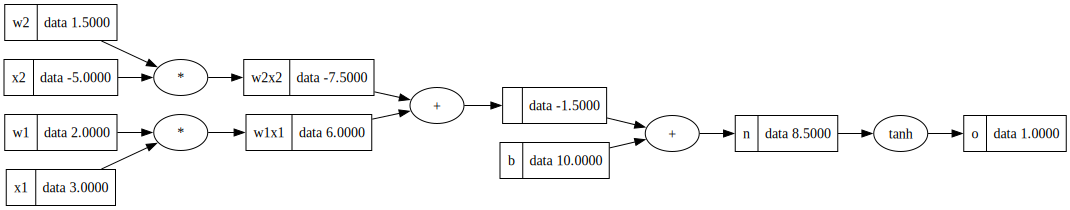

In [71]:
draw_dot(o)

In [12]:
# practice 1 dfs

output = {
    'o': ['n'],
    'n': ['w1x1w2x2', 'b'],
    'w1x1w2x2': ['w1x1', 'w2x2'],
    'b': [],
    'w1x1': ['w1', 'x1'],
    'w2x2': ['w2', 'x2'],
    'w1': [],
    'x1': [],
    'w2': [],
    'x2': ['o'],
}

{
    'o': []
}

{
    'o': ['n'],
    'n': []
}

{
    'o': ['n'],
    'n': ['o']
}


# depth frist search result ： [w1,x1, w2, x2, w1x1, w2x2, w1x1w2x2, b, n, o] WRONG
# ['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']

result = [];
visited = set()
def dfs(g, node):
    if node not in visited:
        visited.add(node)
        for i in g[node]: 
            dfs(g, i)
        result.append(node)


dfs(output, 'o')
print(result)


# how to traverse throgh array of strings, get each value? for i in arr, for i in range (len(arr))?

['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']


In [88]:
# use Adjacency list to represent Value data struct
# o = tanh(w1x1+w1x2 + b)
output = {
    'o': ['n'],
    'n': ['w1x1w2x2', 'b'],
    'w1x1w2x2': ['w1x1', 'w2x2'],
    'b': [],
    'w1x1': ['w1', 'x1'],
    'w2x2': ['w2', 'x2'],
    'w1': [],
    'x1': [],
    'w2': [],
    'x2': [],
}


# depth frist search 
# input, graph: output 
# output, [w1, x1, w1x1, x2,w2, w2x2, w1x1w2x2, b, n, o]
result = [];
# start_node = o
visited = set()
def build_result(g, n):
    if n not in visited:
        visited.add(n)
        for nei in g[n]:
            build_result(g, nei)
        result.append(n)

build_result(output, 'o')
print(result)




['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']


In [ ]:
#breath first search 
# input graph, output
# output, [o, n, w1x1w2x2, b, w2x2, w1x1, w1, x1, w2, x2]
# start with node o

result = []
build_result(output, 'o')
print(result)

def build_result(g, n):
    # get all the child around this node 
    allnodes = []
    result.append(n)
    for child in g[n]:
        allnodes.append(child)
        



# topological sort 

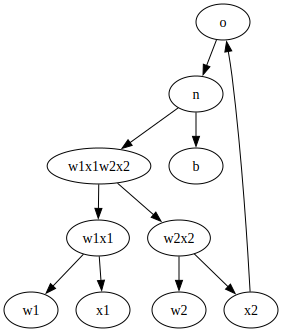

In [79]:
from graphviz import Digraph
g = Digraph(format="svg")
for node in output:
    for nei in output[node]:
        g.edge(node, nei)

g

In [ ]:
neuron = {
    o: {op: 'tanh', oprands: [n], label: 'o'},
    n: {op: '+', oprands: [w1x1w2x2, b], label: 'n'},
    w1x1w2x2: {op: '+', oprands: [w1x1, w2x2], label: 'w1x1w2x2'}
    b: {op: '', oprands: [], label: 'b'}
    w1x1: {op: '*', oprands: [w1, x1], label: 'w1x1'}
    w2x2: {op: '*', oprands: [w2, x2], label: 'w2x2'}
    w1: {op: '', oprands: [], label: 'w1'}
    x1: {op: '', oprands: [], label: 'x1'}
    w2: {op: '', oprands: [], label: 'w2'}
    x2: {op: '', oprands: [], label: 'x2'}
}

In [58]:
#use some common python to represent graph:

# adjacency lists 
# adjacency matrices(2d arrays)
# dictionary 

# things has relationship with each other, the relationship is edges, the things are vertices or nodes



graph1 = {
    'A': [],
}

xzzzzzzzzzzzzzzzzzzzz = {
    'A': ['B', 'C'],
    'B': [],
    'C': [],
}

# graph3= {'A': {'B': {}, 'C': {}}
graph3 = {
    'A': {'B': {}, 'C': {}}
}

topo = [] 
# graph1 output [A]
# graph2 output [B, C, A]
# graph3 output [B, C, A]

def build_topo(g, n):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g[n]:
        print("child is: ", child)
        build_topo(graph, child)
    # once build child, add n into topo list 
    topo.append(n)


def build_topo1(g):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g:
        print("child is: ", child)
        build_topo1(child)
    # once build child, add n into topo list 
    topo.append(g)

# start topological sort, start with node 'A'
build_topo1(graph3)


# graph2 = {
#     'A': ['B', 'C', 'E'],
#     'B': ['D', 'E'],
#     'C': [],
#     'D': [],
#     'E': [],
# }

topo


child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# traverse the graph o 



In [ ]:
# vitulize the graph o 

In [87]:
result = (3**0.0001 - 1) / 0.0001
result

1.0986726383266365

In [ ]:
# array 

1. 1. Two Sum

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]
 

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
 

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?
        

In [14]:
# practice 1

# Input: nums = [2,7,11,15], target = 9
# Output: [0,1]
# Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
# Example 2:


nums = [2,7,11,15]
target = 9

# brute force, 
# time o2, outer n, innner n-1 + n-2 + n-3 +.... +1 = n(n-1)/2, total n-1 times, average n/2, total n*n/2, grow on the order of n^2
# space o1, traverse and indexing doesn't allocate new memory 
def twoSum(nums):
    n = len(nums)
    for i in range(n):
        for j in range(i+1, n):
            if nums[i] + nums[j] == target:
                return [i, j]

result = twoSum(nums);
print(result)

[0, 1]


In [20]:
# practive on

[0, 1]


In [17]:
# look for pair number from unseen numbers, current number right side 

from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # i = 0
        # j = 1
        # for i=0, i<=nums.len i++:
        #     if (nums[i] + nums[j]) == target:
        #         return [i, j]
        #     j++
        n = len(nums)
        for i in range(n): 
            for j in range(i+1, n:
                if nums[i] + nums[j] == target:
                    return [i, j]
        return []

# how to iterate through a list of numbers with index?
# how to compare two number values equals to each other 
# 
# The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a specified number.
# however it is possible to specify the starting value by adding a parameter: range(2, 6), which means values from 2 to 6 (but not including 6):

        

nums = [2,7,11,15]
target = 9
s = Solution()

result = s.twoSum(nums, target)
result 

[0, 1]

brute force approach analyze:(self)
time complexity, O(n^2), 
traverse array one on top another, each char compare to each every other char, each char use i to index, that is O(n), 
every other char is loop through another array, that's O(n), so O(n)*O(n) is O(n^2)

space, O(n), 
len(array), only access the object stored integer value
traverse array does not allocate new memory, 
indexing only create a new char object, very small

brute force approach analyze:
time complexity, O(n^2), 
outer loop runs n times,
inner loop runs (n-1)*(n-2)*(n-3)*(n-4)*....*1 = n!/n (WRONG)
(n-1) + (n-2) + (n-3)+ ... + 1 = n(n-1)/2 (see below for details)
say we find the pair, the worst case at the very end of the array [2,7,11,15]
so we totally did total n + n(n-1)/2 operations, which is n(n+1)/2 operations, the operations grow on the order of n^2
(keep the highest-degree term, drop constants and smaller terms when describing growth.)

space, O(n), 
len(array), only access the object stored integer value
traverse array does not allocate new memory, 
indexing only create a new char object, very small

In [ ]:
factorial, non-negative integer n, denoted by n!, is the product of all possible integers less than or equal to n
1*2*3*4*....n = n!

fibonacci sequence, fn = fn-1 + fn-2, (f0= 1, f1 =1)
1, 1, 2, 3, 4, 5...n

sum of n non-negative integeter series:
1+2+3+4+5+...n , Sum = n+(n-1)+(n-2)+(n-3) + .... +2+1 
                     = n + (n + n + n + ...)+(-1 + -2 + -3 +.... -n)
                     = n + n*n - Sum
                2Sum = n(n+1)
                 Sum = n(n+1)/2
                 
sum of innner loop, for two sum brute foce, index j moved 
                 Sum = (n-1) + (n-2) + (n-3)+ ... + 1 
                     = n(n+1)/2 - n 
                     = n(n-1)/2      

In [5]:
# improve time and space complexity from O(n^2) to O(n), look for pair number from seen numbers, cur number left side 

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        secondnum = {}
        for i, x in enumerate(nums):
            secondnum[x] = i
            
        for i, x in enumerate(nums):
            y = target - nums[i]
            if y in secondnum and secondnum[y] != i:
                return [i, secondnum[y]]

        return []


nums = [2,7,11,15]
target = 9
s = Solution()

result = s.twoSum(nums, target)
result 

[0, 1]

In [ ]:
# a better way, to iterate only once, and find the two index of two number sum is target 
Still compare all pairs, but instead of iterating, change to searching 
one way current number compare to all unvisited right side, 
The other way compare current number to all visited number form left side  
Switch from iterating O(n) to searching  O(1), take advantage of of hash map 

target: 13
input nums: [2, 7, 5, 9]

map{}
i: 0, num: 2, look targe - current = 13-2 = 11, map[11], not find continue 

add i, num, into map {2: 0, }
i: 1, num: 7, look t-c = 13-7 = 5, map[5], not exist, continue 

update map {2: 0, 7: 1}
i: 2, num: 5, look t-c = 13-5 = 7, map[7], exit, return [i, map[7]]



The idea of using a hash map for optimization is very common in problems where you need to keep track of information you’ve already seen 
(like in Two Sum, finding pairs, or solving problems involving counting frequencies).

It becomes intuitive over time: Once you solve a few problems with hash maps, 
the idea of using them for “search-as-you-go” becomes second nature.


In [31]:
nums = [2,7,11,15]
target = 9

# for quick lookup, seen number and index, 2: 0


seen = {}
def twoSum(nums):
    for i, x in enumerate(nums):
        comp = target - x
        if comp in seen:
            return [seen[comp], i]
        # store current value into seen, not complement 
        seen[x] = i 
    return None
        
# don't reply on globals,pass target, and keep seen inside the function, so repeated call don't leak state.
result = twoSum(nums);
print(result)

# how to add element into dict?
# in js use None

# list, dict, set, add new element 
# list.append("a")
# dict["a"] = "b"
# set.add("a")

[0, 1]


In [ ]:
nums = [2,7,11,15]
target = 9

# for quick lookup, seen number and index, 2: 0



def twoSum(nums):
    seen = {}
    for i, x in enumerate(nums):
        comp = target - x
        if comp in seen:
            return [seen[comp], i]
        # store current value into seen, not complement 
        seen[x] = i 
    return None
        
# don't reply on globals,pass target, and keep seen inside the function, so repeated call don't leak state.
result = twoSum(nums);
print(result)

# how to add element into dict?
# in js use None

# list, dict, set, add new element 
# list.append("a")
# dict["a"] = "b"
# set.add("a")

In [ ]:
# code better in python and in general: (5 year I didn't read one book around this field, I really need to read!!!)

# Rule of thumb

Prefer passing state via parameters/returns or encapsulate it in a class.

Use globals only for constants/config that don’t mutate during runtime.


# continue formal 
Hidden dependencies: The function’s behavior depends on outside variables not shown in its signature. Harder to read, reuse, and test.

State leakage across calls: A mutable global (e.g., seen) keeps old data between calls and can corrupt later results.

Test brittleness: Unit tests must reset globals between tests or they’ll interfere with each other.

Concurrency issues: Multiple threads/async tasks can race on the same global and produce wrong answers.

Jupyter/REPL gotcha: In notebooks, globals persist across cells. Rerunning a function might accidentally use stale state.

Initialization/order bugs: If a global isn’t initialized (or is modified elsewhere), you get nondeterministic behavior.

Scoping footguns: Accidentally reassigning a global inside a function (without global) causes UnboundLocalError.

In [ ]:
# State leakage across calls
# global cache accumulates between calls 

seen = {}

def two_sum(nums, target):
    for i, x in enumerate(nums):
        c = target - x
        if c in seen:          # uses old state
            return [seen[c], i]
        seen[x] = i
    return None

print(two_sum([4, 10], 50))  # builds seen={4:0, 10:1}
print(two_sum([40], 50))     # WRONG: might use stale '10' from prior call

In [ ]:
# fix State leakage across calls
# localize state, put var inside of the function, called local var 

def two_sum(nums, target):
    seen = {}
    for i, x in enumerate(nums):
        c = target - x
        if c in seen:          # uses old state
            return [seen[c], i]
        seen[x] = i
    return None

In [ ]:
# Test brittleness
# test depends on clearing global

counter = 0

def incr():
    global counter 
    counter += 1
    return counter

# Test A
counter = 0
assert incr() == 1

# Test B (forgot to reset)
# assert incr() == 1      # Fails: returns 2

In [ ]:
# fix Test brittleness
# no shared mutable global
def incr(counter):
    return counter + 1

# independent tests
assert incr(0) == 1
assert incr(0) == 1

In [ ]:
# Concurrency issues
# global shared without lock ??

import threading

count = 0

def work(n):
    global count
    for _ in range(n):
        count += 1  # not atomic

threads = [threading.Thread(target=work, args=(100_000,)) for _ in range(2)]
[t.start() for t in threads]
[t.join() for t in threads]
print("count =", count)  # Often < 200000 (lost updates)


In [ ]:
# fix Concurrency issues
# synchronize access ?? (need to review this in the future)

import threading

count = 0
lock = threading.Lock()

def work(n):
    global count
    for _ in range(n):
        with lock:
            count += 1

# Now reliably prints 200000


In [ ]:
# Jupyter/REPL gotcha (state survives reruns)
# cell 1
log = []  # global lives across cells

# cell 2

def record(x):
    log.append(x)
    return log

# cell3
record("A")  # ['A']

# re run cell 3
record("A")  # ['A', 'A']  <-- stale state bites you

# to fix it, don't rely on notebook globals 

def record(x, _log=None):
    _log = [] if _log is None else _log
    _log.append(x)
    return _log

## why use _log, not log? why log=None, not [], or (), or {}

Great eye! Two separate things here:

## 1) Why name the parameter `_log` instead of `log`?

* **Avoids shadowing**: maybe you already have a global `log` list (or a `log()` function / `logging` logger). Using `_log` makes it clear this is the **internal** parameter and won’t accidentally refer to some outer variable.
* **Signals “internal-use”**: leading underscore is a common Python convention for “private-ish” names. It tells readers this is just a helper container inside the function’s API.

> It’s not required—`log` would work—but `_log` reduces ambiguity and surprises.

## 2) Why `log=None` instead of `[]`, `()`, or `{}`?

Short answer: to avoid the **mutable default argument** trap.

### The trap

Defaults are evaluated **once**, at function **definition** time—not at each call.

```python
def collect(x, bag=[]):    # BAD default
    bag.append(x)
    return bag

print(collect(1))  # [1]
print(collect(2))  # [1, 2]   <-- oops, it remembered prior call
print(collect(3))  # [1, 2, 3]
```

The same bug happens with `{}` (dict) or `set()`—they’re mutable.

### The safe “sentinel” pattern

Use `None` as a sentinel, then create a **fresh** container inside:

```python
def record(x, _log=None):
    if _log is None:
        _log = []          # new list each time if none provided
    _log.append(x)
    return _log

print(record("A"))         # ['A']
print(record("B"))         # ['B']  <-- fresh each call
```

This also lets you **pass in** an existing list if you *want* to accumulate into one:

```python
shared = []
record("A", shared)
record("B", shared)
print(shared)              # ['A', 'B']
```

### What about `()` (tuple)?

* Tuples are **immutable**, so you can’t append in place. You’d do `acc = acc + (x,)`, which creates a new tuple every time (O(n) copy).
* Defaulting to `acc=()` wouldn’t cause the same mutation bug, but it’s inefficient for “collect items” and easy to misuse later if someone switches to a mutable op.

### What about `{}` or `set()`?

* They’re mutable → same bug as `[]`.
* Use `None` + create a fresh dict/set inside, or for classes/dataclasses use a **default factory**:

  ```python
  from dataclasses import dataclass, field

  @dataclass
  class Bucket:
      bag: list[int] = field(default_factory=list)  # fresh list per instance
  ```

---

## Tiny side-by-side summary

**Buggy**

```python
def f(x, bag=[]):
    bag.append(x)
    return bag
```

**Safe + flexible**

```python
def f(x, bag=None):
    if bag is None:
        bag = []
    bag.append(x)
    return bag
```

**When would you *ever* use a mutable default?**
Rarely—only if you **intentionally** want state shared across calls (and you document it!), e.g., a simple cache. Even then, most folks prefer an explicit cache variable, a closure, or `functools.lru_cache` to keep state management clear.

Rule of thumb:

* Use `None` sentinels for containers (`list`, `dict`, `set`)
* Name internal helper parameters with a leading underscore if it prevents shadowing or clarifies intent.


In [ ]:
# Initialization/order bugs
# uses CONFIG before it’s set or after someone mutates it  ??????
 
CONFIG = None

def get_url():
    return CONFIG["url"]  # TypeError/NameError if called too early

# get_url()  # boom
CONFIG = {"url": "https://example.com"}
print(get_url())  # works now… but order-dependent




In [ ]:
# fix Initialization/order bugs
# validate or inject ?????????????? this is confusing

def get_url(config):
    if "url" not in config:
        raise ValueError("Missing 'url'")
    return config["url"]

print(get_url({"url": "https://example.com"}))

In [ ]:
# Scoping footguns (UnboundLocalError)

x = 10
def f():
    print(x)   # UnboundLocalError: local variable 'x' referenced before assignment
    x = 20     # assignment makes 'x' local in this scope

# f()


In [ ]:
# fix Scoping footguns (UnboundLocalError)

# Don’t assign; just read the global:
x = 10
def f():
    print(x)  # 10
f()


# or If you really must assign the global, say so explicitly (use sparingly):
x = 10
def f():
    global x
    x = 20
f()
print(x)  # 20


`global` tells Python: “Inside this function, this name refers to the <font color='red'>**module-level** variable </font> , not a new local.” You need it **only when you assign** to that name (rebinding). Reading a global doesn’t require `global`.

### Quick rules

* **Reading?** No `global` needed.
* **Assigning/Rebinding (including `+=`, `-=`)?** Use `global`.
* **Mutating a global *object* (e.g., `.append`, dict update) without rebinding?** No `global` needed.
* **Inner function wants outer (non-module) var?** Use `nonlocal`, not `global`.

### Tiny examples

#### 1) Read global (OK without `global`)

```python
x = 10

def show():
    print(x)   # 10

show()
```

#### 2) Rebind global (needs `global`)

```python
x = 10

def bump():
    global x
    x = x + 1   # rebinding the module-level x

bump()
print(x)  # 11
```

Without `global`, this fails:

```python
x = 10
def bump():
    x = x + 1   # UnboundLocalError: Python treats x as local because of assignment
```

#### 3) Augmented assignment counts as rebinding (needs `global`)

```python
x = 10
def bump():
    global x
    x += 1
bump()
print(x)  # 11
```

#### 4) Mutate a global *object* (no `global` needed)

```python
bag = []

def add_one():
    bag.append(1)  # mutation, not rebinding

add_one()
print(bag)  # [1]
```

…but rebinding the name **does** need `global`:

```python
bag = []

def replace_bag():
    global bag
    bag = bag + [1]  # creates a new list and rebinds the name

replace_bag()
print(bag)  # [1]
```

#### 5) Multiple names

```python
a = b = 0
def set_both():
    global a, b
    a, b = 1, 2
```

#### 6) `global` vs `nonlocal`

```python
x = 0
def outer():
    y = 0
    def inner():
        nonlocal y   # refers to y in outer(), not the module
        y += 1
    inner()
    return y

print(outer())  # 1
```

### Notes & gotchas

* `global` is **module-scoped**, not “program-wide.” It doesn’t reach into other modules.
* `global x` doesn’t read x for you; reading before it’s assigned somewhere will raise `NameError`.
* Prefer avoiding `global` for mutable state—pass values, return results, use a class, or use a closure with `nonlocal`.

**Rule of thumb:** Use `global` only when a simple script truly needs to tweak a module variable. For reusable code, avoid it.

    

# Python resolves names through **4 lexical levels** — the **LEGB** rule:

1. **L**ocal (current function)
2. **E**nclosing (any outer def’s locals; a closure)
3. **G**lobal (the current **module**’s top level)
4. **B**uilt-ins (the `builtins` module: `len`, `sum`, …)

A `global x` tells Python “bind `x` in the **G**lobal/module level,” not in Local. `nonlocal x` says “bind in an **E**nclosing\*\* (outer function) scope.”

Here’s a compact tour with real examples:

### LEGB in action

```python
x = "G"  # Global (module)

def outer():
    x = "E"  # Enclosing
    def inner():
        x = "L"  # Local
        print("inner:", x)   # L
    inner()
    print("outer:", x)       # E

outer()
print("module:", x)          # G
```

### Rebinding in Enclosing vs Global

```python
def outer():
    x = 0
    def bump_enclosing():
        nonlocal x   # use enclosing 'x'
        x += 1
    bump_enclosing()
    return x

x = 0
def bump_global():
    global x         # use module 'x'
    x += 1
```

### Built-ins level (last resort)

```python
import builtins
print(builtins.len([1,2,3]))  # 3

# Shadowing a builtin (don’t do this):
len = 42
# builtins.len([1,2,3]) still works, but plain len(...) is broken now
del len  # unshadow
```

### No block scope for if/for/while (but comprehensions have their own)

```python
def f():
    for i in range(3):
        pass
    print(i)  # 2 — loop variables leak into function locals

x = 99
[x for x in range(3)]
print(x)      # 99 — list/set/dict/generator comprehensions have their own scope
```

### Class-body quirk (class attrs aren’t in a function’s LEGB)

```python
X = 1
class C:
    X = 2  # class attribute
    def f(self):
        print(X)   # 1 -> finds module/global X, not class X
        print(C.X) # 2 -> access class attribute explicitly
```

---

## Quick cheat sheet

| Level     | What it is                          | How to rebind there  |
| --------- | ----------------------------------- | -------------------- |
| Local     | Current function’s variables        | assignment (default) |
| Enclosing | Outer `def`’s locals (closures)     | `nonlocal name`      |
| Global    | Current module’s top-level names    | `global name`        |
| Built-in  | `builtins` module (`len`, `sum`, …) | (don’t)              |

So, there are **four** lookup levels. Use `global` and `nonlocal` only when you truly need to rebind names in those outer scopes; otherwise keep things local and pass values explicitly.


In [ ]:
# so why dfs result [], is a global var???

4) Mutate a global object (no global needed)
bag = []

def add_one():
    bag.append(1)  # mutation, not rebinding

add_one()
print(bag)  # [1]


In [ ]:
# Python’s scoping ******



In [ ]:
2. 3. Longest Substring Without Repeating Characters

Given a string s, find the length of the longest substring without duplicate characters.

Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.
 

Constraints:

0 <= s.length <= 5 * 104
s consists of English letters, digits, symbols and spaces.

In [ ]:
5. Longest Palindromic Substring

Given a string s, return the longest palindromic substring in s.

 
Example 1:
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.

Example 2:
Input: s = "cbbd"
Output: "bb"
 

Constraints:

1 <= s.length <= 1000
s consist of only digits and English letters.

In [39]:
# practice 1 brute force

def lps(s):
    result = ""
    
    n = len(s)
    if (n <2 ):
        return s
    
    for i in range(n):
        for j in range(i, n):
            ltor = s[i:j+1]
            rtol = ltor[::-1]
            if (ltor == rtol) and len(result) < len(ltor):
                result = ltor
    return result 

s = "babad"
result = lps(s)
print(result)

bab


In [42]:
# practice 1 improved 

def lps(s):
    bleft, bright = 0, 0
    n = len(s)
    if (n < 2 ):
        return s

    for i in range(n):
        # old len "aba"
        l, r = i, i
        while (l >= 0 and r <n and s[l] == s[r]):
            if (r-l+1) > (bright - bleft + 1):
                bright = r
                bleft = l
            l -=1
            r +=1

        # even len
        l, r = i-1, i
        while (l>=0 and r < n and s[l] == s[r]):
            if (r-l+ 1) > (bright - bleft + 1):
                bright = r
                bleft = l
            l -=1
            r +=1
   
    return s[bleft: bright + 1]


s = "babad"
result = lps(s)
print(result)

bab


In [ ]:
 # frist try myself, hahahah
Class Solution:
    def lps(string):
        # need a map, key is the len, value is the string, sorted by the key, what data type can be?
        reuslt = {};
        for i, c in string:
            for i+1, c in string:
                ltor = string[i, i+1]
                rtol = string[i, i+1].reverse
                if (ltor == rtol) result[ltor.len] = ltor
        return result[longest]


Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 
"bab"



In [12]:
s = 'abba'
def traverse(s):
    for i in range(len(s)):
        print(s[i]);
traverse(s)  
    

a
b
b
a


In [11]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            for j in range(i, n):
                ltor = s[i:j+1]
                rtol = ltor[::-1]
                if (ltor == rtol) and len(result) < len(ltor):
                    result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

'bab'

# big O, brute force approach analyze: confused 
no clear understanding of big O, 

time complexity,
outer loop runs n times,
inner loop runs n + (n-1) + (n-2) + (n-3)+ ... + 1 = n(n+1)/2 (see below for details)
substring slicing, n(n+1)/2
substring reversing, n(n+1)/2
comparission, n(n+1)/2
total operations sum up is, n+2n(n+1) = n+2n^2 + 2n = 2n^2
the operations grow on the order of n^2, why you say its O(n^3)???????

time complexity is the sum of operations, right?


** 

traverse string? time O(n), loop through n memory locations, space: O(1) constant, not creating any extra space
slice string? timeO(n), space O(n), acess 2n memoery locations, space: O(n) n, copy original content, paste into new locations
reverse string? space O(n), access n memoery locations, space: O(n) n, copy original content, reverse paste into new locations 

**

# big O, brute force approach analyze: resolved 
no clear understanding of big O, 

time complexity,

## for two sum:
outer loop runs n times,
inner loop runs (n-1) + (n-2) + (n-3)+ ... + 1 = n(n-1)/2 
n-1, times
average each outer loop is: n/2
total: n * (n-1)/2

##  for palindromic substring 
outer loop runs n times,
inner loop runs n + (n-1) + (n-2) + (n-3)+ ... + 1 = n(n+1)/2 
n, times
n + n-1 + n-2 + n-3, ... + 2, + 1, + 0 = n(n+1)/2
n time average is: (n+1)/2
so total: n * (n+1)/2


so far is n^2 times 

each 
substring slicing, n(n+1)/2
substring reversing, n(n+1)/2
comparission, n(n+1)/2
total operations sum up is, n+2n(n+1) = n+2n^2 + 2n = 2n^2
the operations grow on the order of n^2, why you say its O(n^3)???????

time complexity is the sum of operations, right?


** 

traverse string? time O(n), loop through n memory locations, space: O(1) constant, not creating any extra space
slice string? timeO(n), space O(n), acess 2n memoery locations, space: O(n) n, copy original content, paste into new locations
reverse string? space O(n), access n memoery locations, space: O(n) n, copy original content, reverse paste into new locations 

**

Algorithm cost = (how many things you do) × (cost per thing)

If you do n constant-time steps → O(n) (linear).

If you enumerate all pairs (about n(n−1)/2) and each step is O(1) → O(n²) (quadratic).

If you enumerate all substrings (~𝑛2n2) and each check costs O(\text{length}) ≈ O(n) → O(n³) (cubic).

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            if (i-j >= 0 && i+k < len(n)):
                lstr = s[i-j:i+j]
                while (lstr ==  lstr[::-1]):
                    
                if (lstr == rstr) and len(result) < len(ltor):
                result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

In [ ]:
Knowledge:

Python strings are immutable.
That means you can’t change them in place. Most string operations create a new string object (i.e., allocate new memory and copy characters).

What makes new copies:

Slicing: s[i:j] builds a new string of length j-i.

Reversing with slicing: s[::-1] builds a new reversed string.

Concatenation / join / replace / lower / upper / strip / etc.: all return new strings.

Indexing: s[k] returns a 1-char string (a new object, although very small; CPython may reuse some tiny strings via interning, but don’t rely on it).

In [2]:
# O^2 solution self try 

class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            j=0; r = s[i-j]; l = s[i+j]
            while(r == l && r >= 0 && l < n]):
                j++
            if (len(s[i-j, i+j]) > len(result)) result = s[i-j, i+j]
            k=0; r = s[i-1-k]; l=s[i+k]
            while(r == l && r >= 0 && l < n]):
                k++
            if (len(s[i-1-k, i+k]) > len(result)) result = s[i-1-k, i+k]
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

SyntaxError: invalid syntax (3573796693.py, line 7)

In [ ]:
You’ve got the right idea, but the code has a bunch of Python (and indexing) issues:

Python uses and, not &&.

No ++/-- in Python; use += 1 / -= 1.

Index bounds must be checked before indexing (l >= 0 and r < n).

Slices use : not , and are half-open: s[a:b].

Doing r = s[i-j] stores a char, not an index. You want l/r to be indices.

After expanding, the valid palindrome is between the last equal indices (watch off-by-one when slicing).

Here’s your “distance from center” approach rewritten correctly, still O(n²), and very close to what you intended:

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            j=0; r = i-j; l = i+j
            while(r >= 0 and l < n and s[r] == s[l]):
                j +=1
            if (len(s[l, r]) > len(result)):
                result = s[r: l]
            k=0; r = i-1-k; l=i+k
            while(r >= 0 and l < n and s[r] == r[l]):
                k +=1
            if (len(s[r, l]) > len(result)):
                result = s[r: l]
        return result
        

s = "babad"
al = Solution()
result = al.lps(Input)
result 

In [ ]:
# use indexing instead of distance as indices, cause we know the center 

Result = “” 
Variable i start from 0 to the end, indicate the center or one of the single char or the right side char of two center chars index 

i as the center, odd length : 
Variable l represents the index of a char at left side of i, l start with i, step is -1, limitation: l >=0
Variable r represents the index of a char at right side of i, r start with i, step is +1, limitation is: r<len(s)
While s[l] == s[r] if len(s[l, r+1]) > len(result), result = s[l, r+1]

Doubt char as the center, even length:
i-1 and i as the center:
Variable l represents the index of a char at left side of i, l start with i-1, step is -1, limitation: l >=0
Variable r represents the index of a char at right side of i, r start with i, step is +1, limitation is: r<len(s)
While s[l] == s[r] if len(s[l, r+1]) > len(result), result = s[l, r+1]

return result 

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            r = i; l = i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l: r]) > len(result)):
                    result = s[r: l]
                r+=1; l-=1
            
            r = i-1; l=i
            while(r >= 0 and l < n and s[r] == s[l]):
                r+=1; l-=1
            if (len(s[r:l]) > len(result)):
                result = s[r:l]
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

You’re mixing up l and r. Usually we name left as l (decreasing) and right as r (increasing).
In your code, r = i; l = i, but then you check s[r] == s[l] and do r += 1; l -= 1 — so r is acting like left, and l like right. That’s confusing.

Your slice s[l:r] is wrong: in Python s[a:b] is half-open (includes a, excludes b). After expansion, you need s[l+1:r].

For the even case, the if to update result is outside the while, but your r/l are already out of bounds there. You should update inside the loop or adjust indices after.

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l: r+1]) > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l:r+1) > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

In [ ]:
You’re almost there! A few fixes:

The bounds are flipped in your while: you want l >= 0 and r < n (left can’t go below 0; right can’t go past n-1).

Tiny typo in len(s[l:r+1) (missing bracket).

The rest is fine if you keep updating result inside the loop.

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (len(s[l: r+1]) > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (len(s[l:r+1]) > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

In [ ]:
Nice! That works correctly for typical cases. A few quick polish points to make it tighter and faster:

Handle empty input (your current code returns "" anyway, but be explicit).

Don’t build substrings in the inner loop (that’s O(k) each time). Track indices and slice once at the end.

Compare lengths with integers, not len(result) repeatedly.

Minor: unify odd/even logic via a helper to avoid duplication.

In [7]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

---n is:  5
bab


In [ ]:
You’re very close again 👍. The bug is in this line:

if (r - l > len(result)):


👉 r - l is the index difference, not the substring length. In Python, s[l:r+1] has length r - l + 1.
So you should compare r - l + 1 with len(result).

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
Now your code is correct ✅.

Let’s walk through:

What it does

Loops over each position i in the string.

Expands around i for odd-length palindromes.

Expands around (i-1, i) for even-length palindromes.

Updates result whenever a longer palindrome is found.

Finally returns the longest substring.

Example run ("babad")

At i=0: finds "b".

At i=1: expands → "bab" (length 3). Updates result.

At i=2: expands → "aba" (length 3). Keeps result (same length).

Rest doesn’t beat length 3.
So output is "bab" or "aba" (both are valid answers).

In [ ]:
improvements

Right now you slice substrings (s[l:r+1]) inside the loops many times. 
That creates lots of new strings. A common optimization is to just track best indices and slice once at the end:

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        n = len(s)

        bestl = 0
        bestr = 0
        for i in range(n
            # one char ad the center of the palindromic substring
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                    bestl = l; bestr = r
                l-=1; r+=1

            # two char center of the palindromic substring
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                     bestl = l; bestr = r
                l-=1; r+=1
        return s[bestl:bestr+1]
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
✅ This version is now completely correct. Nice work!

Why it works

You keep track of the best palindrome indices (bestl, bestr).

In each expansion (odd and even), you check if the new palindrome length
r - l + 1 is greater than the current best length bestr - bestl + 1.

If so, you update the best indices.

At the end, return s[bestl:bestr+1].

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)

        if n < 2:
            return s


        bestl = 0
        bestr = 0
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                    bestl = l; bestr = r
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                     bestl = l; bestr = r
                l-=1; r+=1
        return s[bestl:bestr+1]
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        bleft, bright = 0, 0
        n = len(s)
        if (n < 2 ):
            return s

        def expand_from_center(l, r):
            while (l >= 0 and r <n and s[l] == s[r]):
                if (r-l+1) > (bright - bleft + 1):
                    bright = r
                    bleft = l
                l -=1
                r +=1

        for i in range(n):
            # ood len "aba"
            expand_from_center(i, i)

            # even len
            l, r = i-1, i
            expand_from_center(i-1, i)
    
        return s[bleft: bright + 1]
        